In [42]:
#importing various packages required for the project.
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [43]:
#creating a dataframe of the csv file using pandas.
df = pd.read_csv('/home/vicyria/Downloads/genres/features_3_sec.csv')
#here we drop the column containing the names of the files as it is of no use to us.
df = df.drop(['filename'],axis = 1)
df.head()

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0   66149          0.335406         0.091048  0.130405  0.003521   
1   66149          0.343065         0.086147  0.112699  0.001450   
2   66149          0.346815         0.092243  0.132003  0.004620   
3   66149          0.363639         0.086856  0.132565  0.002448   
4   66149          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613              2084.565132   
3             1655.289045          111952.284517              1960.039988   
4             1630.656199           79667.267654              1948.503884   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0           117335.771563   3714.560359  ...   39.687145    -3.241280   
1            65671.875673   3869.682242  ...   64.748276    -6.055294   
2            75124.921716   3997.639160  ...   67.336563    -1.768610   
3            82913.639269   3568.300218  ...   47.739452    -3.841155   
4            60204.020268   3469.992864  ...   30.336359     0.664582   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   36.488243     0.722209   38.099152    -5.050335   33.618073    -0.243027   
1   40.677654     0.159015   51.264091    -2.837699   97.030830     5.784063   
2   28.348579     2.378768   45.717648    -1.938424   53.050835     2.517375   
3   28.337118     1.218588   34.770935    -3.580352   50.836224     3.630866   
4   45.880913     1.689446   51.363583    -3.392489   26.738789     0.536961   

   mfcc20_var  label  
0   43.771767  blues  
1   59.943081  blues  
2   33.105122  blues  
3   32.023678  blues  
4   29.146694  blues  

[5 rows x 59 columns]

In [45]:
#playback of a few files from different genres
#blues
ipd.Audio('/home/vicyria/Downloads/genres/blues/blues.00000.wav')

In [47]:
#classica
ipd.Audio('/home/vicyria/Downloads/genres/classical/classical.00009.wav')

In [49]:
#metal
ipd.Audio('/home/vicyria/Downloads/genres/metal/metal.00014.wav')

In [51]:
#jazz
ipd.Audio('/home/vicyria/Downloads/genres/jazz/jazz.00025.wav')

In [58]:
#undrestanding the musical data using mel spectrograms, spectral rolloff, raw waveplot, chroma features, zero crossing rate etc.
#using one of the blues audio file from gtzan as source for the different graphs.
source, sr = librosa.load('/home/vicyria/Downloads/genres/metal/metal.00014.wav')
librosa.feature.melspectrogram(y=source, sr=sr)

array([[3.92732382e-01, 1.04732096e-01, 3.88096552e-03, ...,
        9.57028270e-02, 3.13905925e-01, 1.05929565e+00],
       [9.31678963e+00, 6.32082558e+00, 5.87827682e+00, ...,
        7.29674160e-01, 7.04664886e-01, 1.95095909e+00],
       [2.60183868e+01, 3.70183487e+01, 2.71458683e+01, ...,
        2.64991665e+00, 3.70573282e+00, 1.13573818e+01],
       ...,
       [1.32906163e-04, 3.35665318e-05, 3.93024294e-07, ...,
        4.45286241e-06, 9.56950244e-05, 3.69942747e-04],
       [1.30245200e-04, 3.25831570e-05, 2.78688077e-08, ...,
        1.11193742e-06, 8.44991300e-05, 3.34598357e-04],
       [1.27108244e-04, 3.17803278e-05, 5.21455679e-09, ...,
        1.50085100e-08, 8.17905820e-05, 3.25132074e-04]], dtype=float32)

In [59]:
#creating the spectrogram.
spec = librosa.feature.melspectrogram(y=source, sr=sr, n_mels=128,

                                    fmax=8000)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

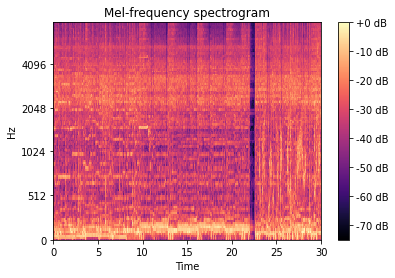

In [60]:
fig, ax = plt.subplots()

spec_db = librosa.power_to_db(spec, ref=np.max)

img = librosa.display.specshow(spec_db, x_axis='time',

                         y_axis='mel', sr=sr,

                         fmax=8000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')

ax.set(title='Mel-frequency spectrogram')

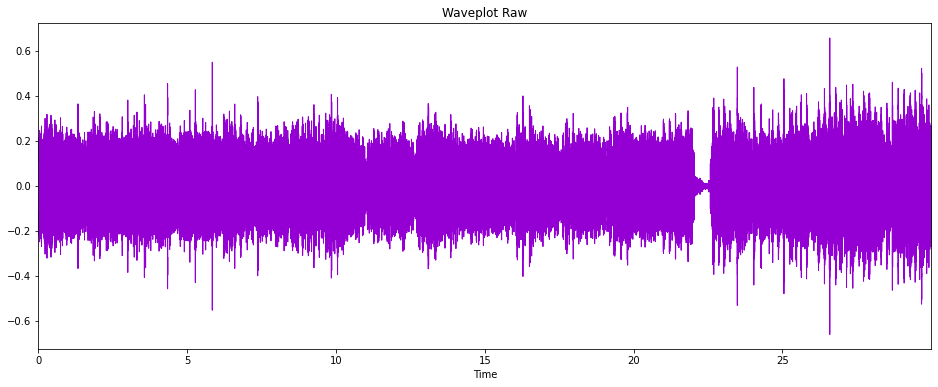

In [75]:
#raw waveplot
plt.figure(figsize=(16,6))
librosa.display.waveplot(source, color = "#9400D3")
plt.title('Waveplot Raw')
plt.show()

Text(0.5, 1.0, 'Spectral Rolloff')

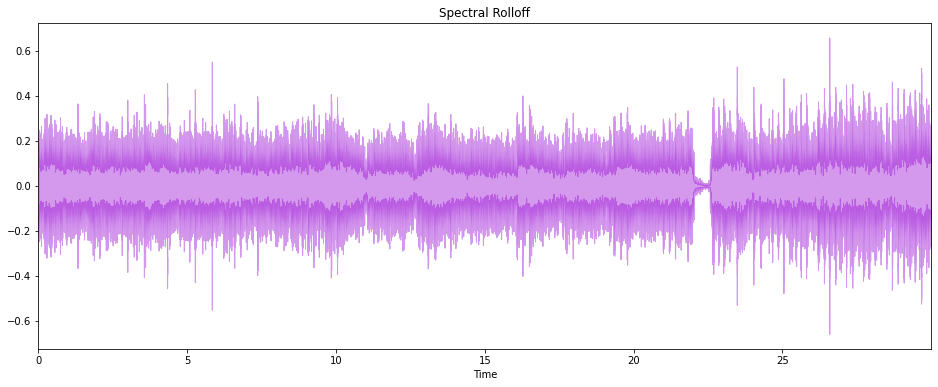

In [74]:
#spectral rolloff
from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(source+0.01, sr = sr)[0]
plt.figure(figsize = (16, 6))
librosa.display.waveplot(source, sr = sr, alpha = 0.4, color = "#9400D3")
plt.title('Spectral Rolloff')

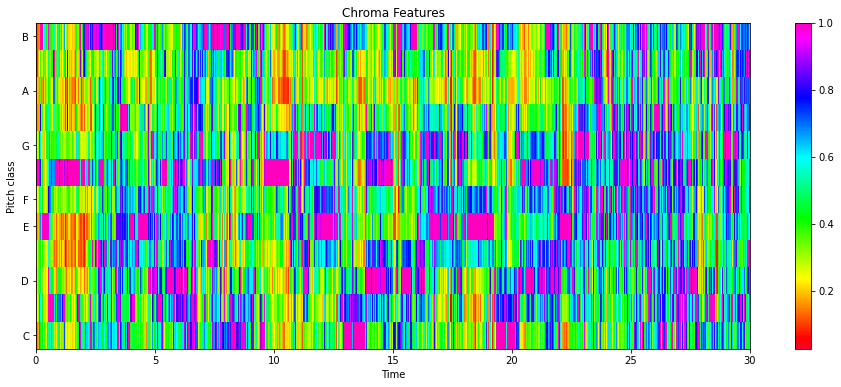

In [76]:
#extracting the chroma features.
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(source, sr = sr)
plt.figure(figsize = (16, 6))
lplt.specshow(chroma , sr = sr, x_axis = 'time', y_axis = 'chroma', cmap = 'gist_rainbow')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

Text(0.5, 1.0, 'Zero-Crossing Rate')

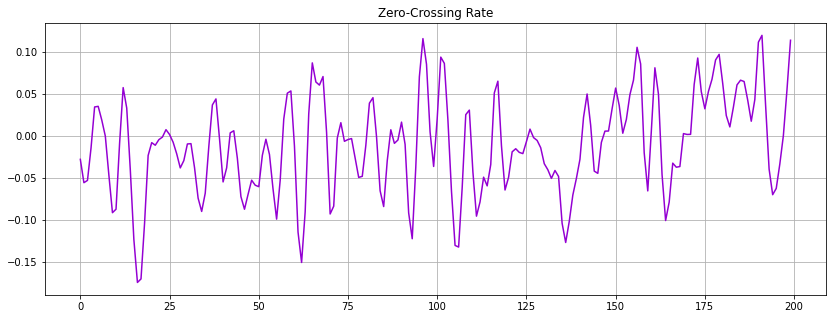

In [64]:
#zero crossing rate
start = 1000
end = 1200
plt.figure(figsize = (14, 5))
plt.plot(source[start:end], color = "#9400D3")
plt.grid()
plt.title("Zero-Crossing Rate")

In [66]:
#displaying the number of zero-crossings that occur in the audio file.
zero_crossing_rate = librosa.zero_crossings(source[start:end], pad = False)
print("Total number of zero-crossings: ", sum(zero_crossing_rate))

Total number of zero-crossings:  41


In [19]:
#preprocessing the data 
#feature extraction
new_list = df.iloc[:, -1]
convertor = LabelEncoder()
source = convertor.fit_transform(new_list)
print(df.iloc[:, -1])

0       blues
1       blues
2       blues
3       blues
4       blues
        ...  
9985     rock
9986     rock
9987     rock
9988     rock
9989     rock
Name: label, Length: 9990, dtype: object


In [20]:
#scaling the features in order to standardize the dataset
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:, :-1], dtype = float))

X_train, X_test, y_train, y_test = train_test_split(X, source, test_size = 0.33)

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

def training_model(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer = optimizer,
                  loss = 'sparse_categorical_crossentropy',
                  metrics = 'accuracy')
    return model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = epochs, batch_size = batch_size)

In [31]:
#creating the CNN and training it on the dataset
def plot_validation(history):
    print("Validation Accuracy", max(history.history["val_accuracy"]))
    pd.Dataframe(history.history).plot(figsize = (16,6))
    plt.show()
    
model = keras.models.Sequential([
    keras.layers.Dense(512, activation = 'relu', input_shape = (X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(256, activation= 'relu'), keras.layers.Dropout(0.2),
    
    keras.layers.Dense(128, activation= 'relu'), keras.layers.Dropout(0.2),
    
    keras.layers.Dense(64, activation= 'relu'), keras.layers.Dropout(0.2),
    
    keras.layers.Dense(10, activation = 'softmax'),
])
print(model.summary())
model_history = training_model(model = model, epochs = 500, optimizer = 'adam')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               30208     
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [32]:
#displaying the loss and accuracy of the model.
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size = 128)
print("Loss:", test_loss)
print("Highest Accuracy achieved:",test_accuracy * 100)

26/26 [==============================] - 0s 896us/step - loss: 0.5274 - accuracy: 0.9311
Loss: 0.5273546576499939
Highest Accuracy achieved: 93.11495423316956


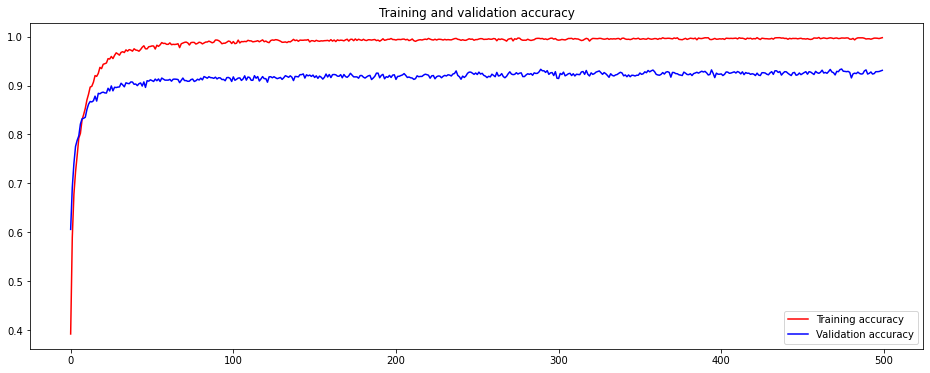

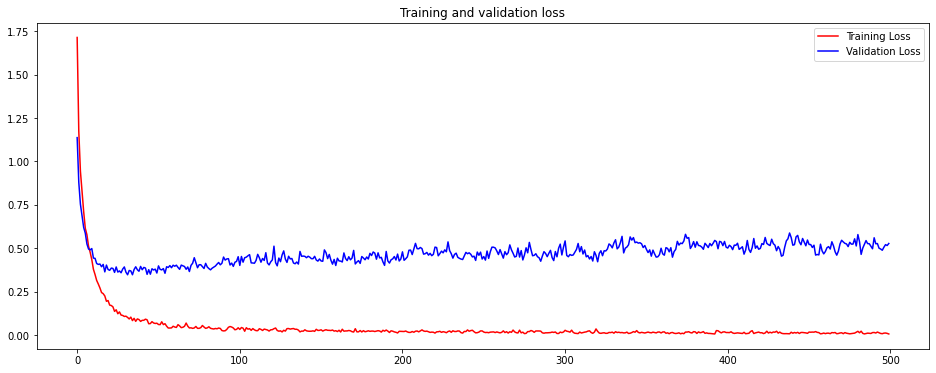

In [33]:
#plotting the performance of the model such as training and validation accuracy and training and validation loss.
def plot_performance(model_history):
    
    acc = model_history.history['accuracy']
    val_acc = model_history.history['val_accuracy']
    loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize = (16, 6))
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.figure(figsize = (16, 6))
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_performance(model_history)

In [55]:
#final testing and using the model to classify the songs into different genres.
def prediction(model, X, y, idx):
    
    genre_dict = {
        0 : "blues",
        1 : "classical",
        2 : "country",
        3 : "disco",
        4 : "hiphop",
        5 : "jazz",
        6 : "metal",
        7 : "pop",
        8 : "reggae",
        9 : "rock",
        }
        
    predictions = model.predict(X)
    genre = np.argmax(predictions[idx])
    
    print("\nTesting the model: \nThe model predicts: {}\nThe actual genre is: {}.\n".format(genre_dict[genre], genre_dict[y[idx]]))

prediction(model, X_test, y_test, 15)


Testing the model: 
The model predicts: classical
The actual genre is: metal.

